# BANK NOTE AUTHENTICATION

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [1]:
###DATASET LINK: https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading the dataset

data=pd.read_csv('BankNote_Authentication.csv')
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
#checking null values

data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
#checking shape of dataset

data.shape

(1372, 5)

In [6]:
#checking weather the dataset is balanced or not

data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [7]:
#Using describe function

data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


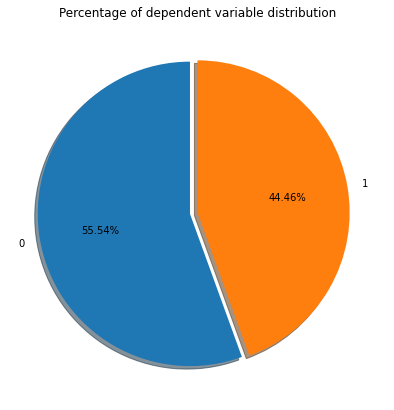

In [8]:
#pie chart to show percentage of the balanced dataset

pie=data['class'].value_counts().reset_index()

fig=plt.figure(figsize=(10,7))
ax=plt.pie(x=pie['class'],labels=pie['index'],autopct='%1.2F%%',explode=[0.05,0],shadow=True,startangle=90)
ax=plt.title('Percentage of dependent variable distribution')

In [9]:
#checking duplicates

data.duplicated().sum()

24

In [10]:
#Removing duplicates

data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [11]:
data.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [12]:
#Spliting the datasetm into independent and dependent variables

X=data[['variance', 'skewness', 'curtosis', 'entropy']]
y=data['class']

## Model building

In [13]:
# Train Test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
#implement random forest classifier

from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
#Prediction

y_pred=classifier.predict(X_test)

In [16]:
#Checking Accuracy

from sklearn.metrics import accuracy_score

score=accuracy_score(y_test,y_pred)
score

0.9950617283950617

In [17]:
#creating a pickle file

In [18]:
import pickle

pickle_in=open('Banknote.pkl','wb')
pickle.dump(classifier,pickle_in)
pickle_in.close()